In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [107]:
data = pd.read_csv('./normalized_data/consolidated.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   position         1328 non-null   int64  
 1   team             1328 non-null   object 
 2   points           1328 non-null   float64
 3   won              1328 non-null   float64
 4   lost             1328 non-null   float64
 5   draw             1328 non-null   float64
 6   played           1328 non-null   float64
 7   goals_for        1328 non-null   float64
 8   goals_against    1328 non-null   float64
 9   goal_difference  1328 non-null   float64
 10  year             1328 non-null   int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 114.2+ KB
None


C:\Users\Sneha\AppData\Local\Temp\ipykernel_2092\2431654695.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")


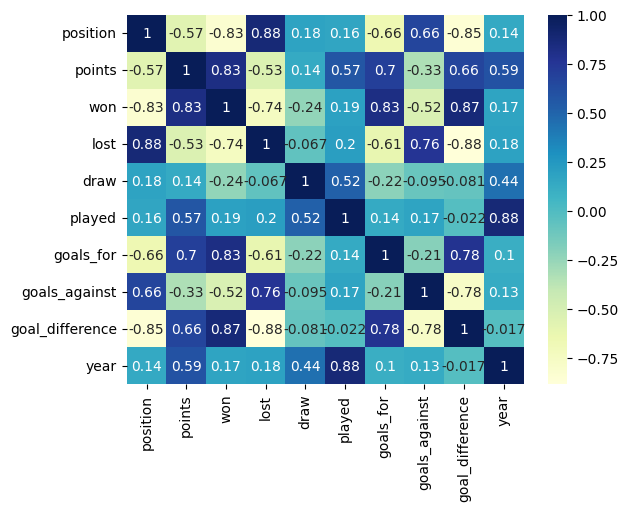

In [108]:
# Check for missing values and data types
print(data.info())

# Check for correlations between variables
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [109]:
data['Win Percentage'] = data['won'] / data['played']
data['Goals Per Game'] = data['goals_for'] / data['played']
data['Goals Against Per Game'] = data['goals_against'] / data['played']
data['Goal Difference Per Game'] = data['goal_difference'] / data['played']

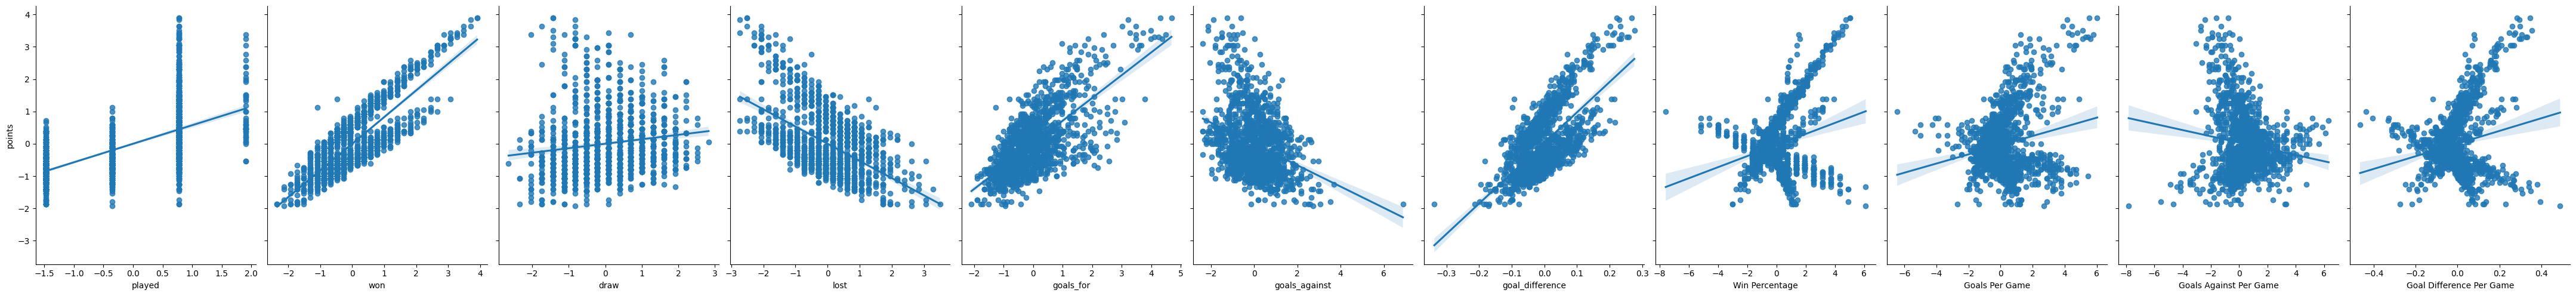

In [110]:
import seaborn as sns

# create a pair plot
sns.pairplot(data, x_vars=['played', 'won', 'draw', 'lost', 'goals_for', 'goals_against', 'goal_difference', 'Win Percentage', 'Goals Per Game', 'Goals Against Per Game', 'Goal Difference Per Game'],
             y_vars=['points'], height=5, aspect=.8, kind='reg')

# display the plot
plt.show()


In [111]:
train_data = data[data['year'] < 2021]
test_data = data[data['year'] == 2021]

features = ['played', 'won', 'draw', 'lost', 'goals_for', 'goals_against', 'goal_difference', 'Win Percentage', 'Goals Per Game', 'Goals Against Per Game', 'Goal Difference Per Game']
target = 'points'


rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(train_data[features], train_data[target])


RandomForestRegressor(max_depth=5, random_state=42)

In [112]:
y_pred = rf_model.predict(test_data[features])
mse = mean_squared_error(test_data[target], y_pred)
r2_error=r2_score(test_data[target],y_pred)
print("Mean Squared Error: ", mse)
print("R-squared Score: ", r2_error)

Mean Squared Error:  0.08282141724143352
R-squared Score:  0.9144172846113237


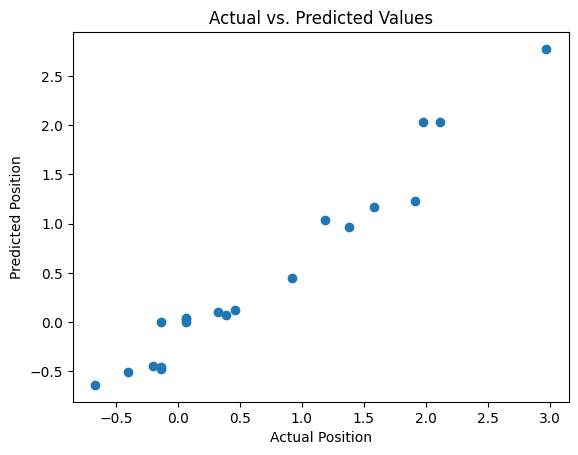

In [113]:
plt.scatter(test_data[target], y_pred)
plt.xlabel("Actual Position")
plt.ylabel("Predicted Position")
plt.title("Actual vs. Predicted Values")
plt.show()

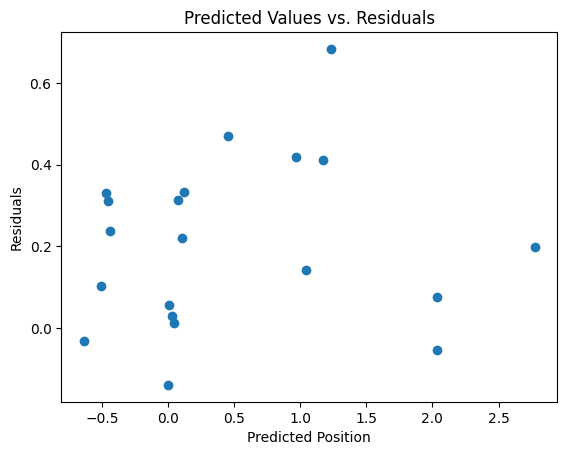

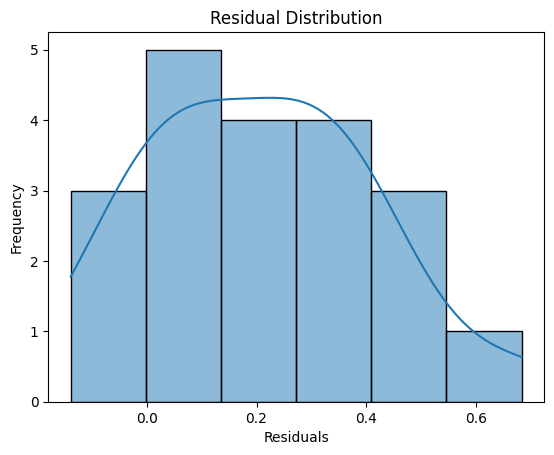

In [116]:
# Create a scatter plot of predicted values vs. residuals
plt.scatter(y_pred, test_data[target] - y_pred)
plt.xlabel("Predicted Position")
plt.ylabel("Residuals")
plt.title("Predicted Values vs. Residuals")
plt.show()

# Create a histogram of residuals
sns.histplot(test_data[target] - y_pred, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

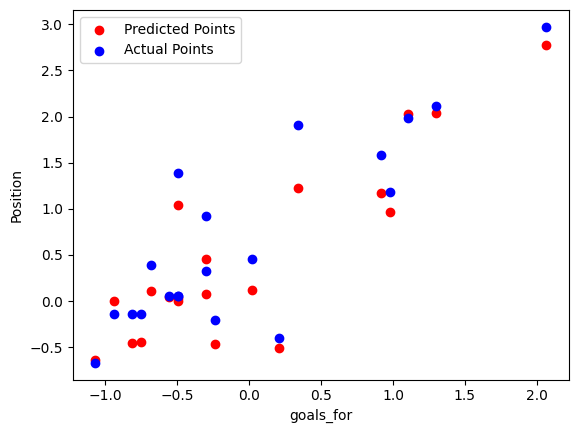

In [148]:
import matplotlib.pyplot as plt

# scatter plot for predicted position
plt.scatter(test_data["goals_for"], y_pred, color='red', label='Predicted Points')

# scatter plot for actual position
plt.scatter(test_data["goals_for"], test_data[target], color='blue', label='Actual Points')

plt.xlabel("goals_for")
plt.ylabel("Position")
plt.legend()

plt.show()


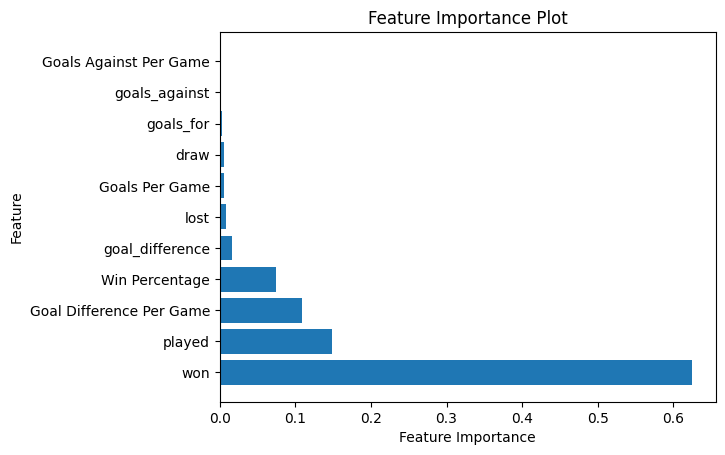

In [117]:
# Create a bar plot of feature importance
coef_df = pd.DataFrame({'feature': test_data[features].columns, 'importance': rf_model.feature_importances_})
coef_df = coef_df.sort_values(by='importance', ascending=False)

plt.barh(coef_df['feature'], coef_df['importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Plot")
plt.show()

In [118]:
from sklearn.metrics import r2_score, mean_absolute_error

mae = mean_absolute_error(test_data[target], y_pred)


accuracy = (1 - (mae / test_data[target].mean())) * 100


print("Percentage Accuracy:", accuracy)


Percentage Accuracy: 66.63493178876264


In [146]:
#print(y_pred)
print(len(y_pred))
y_pred.sort()
y_pred=np.flip(y_pred)
print(y_pred)

20
[ 2.77380754e+00  2.03662343e+00  2.03243398e+00  1.23013171e+00
  1.17138190e+00  1.04208338e+00  9.65315203e-01  4.50776989e-01
  1.24195740e-01  1.04705675e-01  7.74566750e-02  4.68934143e-02
  2.86767130e-02  3.63248475e-03 -1.20998165e-04 -4.42654548e-01
 -4.50524246e-01 -4.70251842e-01 -5.07252182e-01 -6.36952418e-01]


In [147]:
mean_points= 41.10165662650602
stdev_points= 15.099800434416446
teams = test_data.iloc[2]['team']
for i in range (0,len(y_pred)):
    points=y_pred[i]*stdev_points+mean_points
    print(i+1,test_data.iloc[i]['team'],points)


1 Real Madrid 82.9855968494287
2 Barcelona 71.85426397455281
3 Atlético Madrid 71.79100417802033
4 Sevilla 59.67639995675416
5 Real Betis 58.78928957298109
6 Real Sociedad 56.836907684034976
7 Villarreal 55.677723551392845
8 Athletic Bilbao 47.90829919589642
9 Valencia 42.9769875147482
10 Osasuna 42.68269143028285
11 Celta Vigo 42.27123696168478
12 Rayo Vallecano 41.809737824231405
13 Elche 41.53466927009286
14 Espanyol 41.15650642124951
15 Getafe 41.099829578359135
16 Mallorca 34.41766129033206
17 Cádiz 34.29883041851104
18 Granada 34.00094765433508
19 Levante 33.44224991519486
20 Alavés 31.483802235310733
